In [6]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

plt.style.available
# TODO START

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [2]:
# TODO Генерация двумерных данных
X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

In [7]:
# TODO Обучение модели SVM с линейным ядром
clf = SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X, y)

# TODO. Параметры модели
w = clf.coef_ [0] # вектор нормали
b = clf.intercept_[0]   # смещение

print(X[:10, 1])
print(clf.coef_)

[-1.25717844 -1.88029525  3.00225822 -1.85297943 -1.83745666 -1.67278867
 -1.81038476  0.69896733 -1.09340317  1.89002959]
[[-0.62743986  0.74783622]]



**`граница` и `margin` привязаны к Вектору нормали `w`**

In [4]:
# TODO Расчёт разделяющей границы и отступов, граница и margin привязаны к Вектору нормали w
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]                    # разделяющая прямая
margin = 1 / np.linalg.norm(w)
y_margin_up = y_vals + margin                           # margin верхняя граница отступа
y_margin_down = y_vals - margin                         # margin нижняя граница отступа
np.meshgrid
x_vals.shape

(100,)

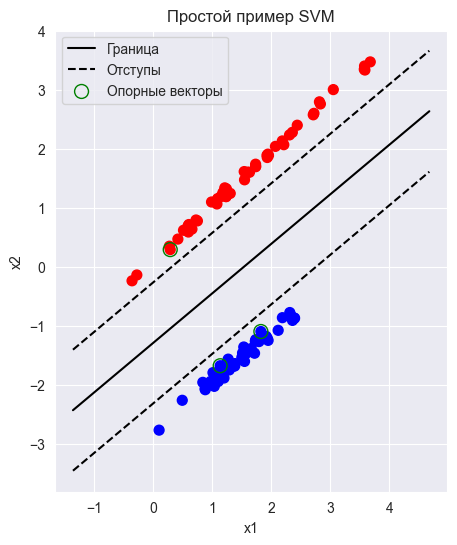

In [5]:
# TODO Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)     # точки
plt.plot(x_vals, y_vals, 'k-', label='Граница')
plt.plot(x_vals, y_margin_up, 'k--', label='Отступы')
plt.plot(x_vals, y_margin_down, 'k--')

# TODO Опорные векторы
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='green', label='Опорные векторы')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Простой пример SVM')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()